<a href="https://colab.research.google.com/github/A24bhi/Credit-Card-Fraud-Detection./blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:

df = pd.read_csv("/content/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
missing_values = df.isnull().sum()

In [ ]:
missing_values[missing_values > 0]

,0
V7,1
V8,1
V9,1
V10,1
V11,1
V12,1
V13,1
V14,1
V15,1
V16,1


In [ ]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Verify if all missing values are removed
print(df_cleaned.isnull().sum().sum())  # Should print 0

0


In [ ]:
# Count the number of genuine and fraud transactions
genuine_count = df_cleaned[df_cleaned["Class"] == 0].shape[0]
fraud_count = df_cleaned[df_cleaned["Class"] == 1].shape[0]

# Calculate the percentage of fraud transactions
fraud_percentage = (fraud_count / (genuine_count + fraud_count)) * 100

# Print the results
print(f"Number of Genuine Transactions: {genuine_count}")
print(f"Number of Fraud Transactions: {fraud_count}")
print(f"Percentage of Fraud Transactions: {fraud_percentage:.4f}%")


Number of Genuine Transactions: 142414
Number of Fraud Transactions: 271
Percentage of Fraud Transactions: 0.1899%


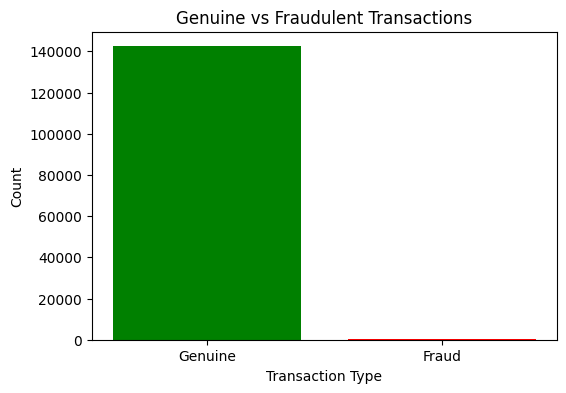

In [ ]:
import matplotlib.pyplot as plt

# Bar plot for genuine vs fraud transactions
labels = ["Genuine", "Fraud"]
counts = [genuine_count, fraud_count]

plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Genuine vs Fraudulent Transactions")
plt.show()

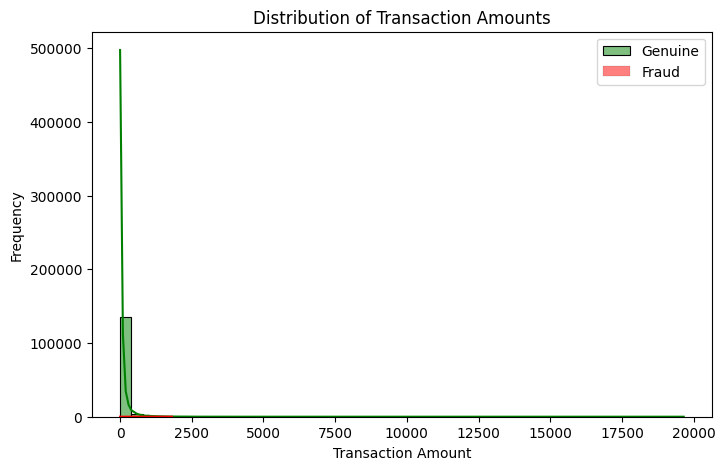

In [ ]:
import seaborn as sns

# Set plot size
plt.figure(figsize=(8, 5))

# Plot transaction amounts for genuine and fraud transactions
sns.histplot(df_cleaned[df_cleaned["Class"] == 0]["Amount"], bins=50, color="green", label="Genuine", kde=True)
sns.histplot(df_cleaned[df_cleaned["Class"] == 1]["Amount"], bins=50, color="red", label="Fraud", kde=True)

plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Amounts")
plt.legend()
plt.show()


In [ ]:
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest

# Z-score method for outliers
z_scores = np.abs(zscore(df.drop(columns=['Class'])))  # Exclude target column
df_cleaned = df[(z_scores < 3).all(axis=1)]  # Remove extreme outliers

# Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(df_cleaned.drop(columns=['Class']))
df_cleaned = df_cleaned.copy()  # Create a new copy to avoid warnings
df_cleaned.loc[:, 'Anomaly'] = outliers
df_cleaned = df_cleaned.loc[df_cleaned['Anomaly'] == 1].drop(columns=['Anomaly'])
# Keep only normal data

print(f"Data size after outlier removal: {df_cleaned.shape}")


Data size after outlier removal: (122404, 31)


In [ ]:
print(df.columns)  # Check existing column names

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'NormalizedAmount'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Display first few rows
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
df = df.dropna(subset=['Class'])

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# Split the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset sizes
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (114148, 30)
Testing set size: (28537, 30)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on training data
dt_model.fit(X_train, y_train)

# Predict on test set
dt_predictions = dt_model.predict(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on training data
rf_model.fit(X_train, y_train)

# Predict on test set
rf_predictions = rf_model.predict(X_test)


In [ ]:
import numpy as np

# Check how many predictions match
matching_predictions = np.sum(dt_predictions == rf_predictions)

print(f"Number of Matching Predictions: {matching_predictions} out of {len(y_test)}")

Number of Matching Predictions: 28514 out of 28537


In [ ]:
import pandas as pd

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'DecisionTree': dt_predictions, 'RandomForest': rf_predictions})

# Display the first few rows
print(comparison_df.head(10))


        Actual  DecisionTree  RandomForest
117773     0.0           0.0           0.0
20848      0.0           0.0           0.0
131911     0.0           0.0           0.0
61198      0.0           0.0           0.0
73729      0.0           0.0           0.0
123038     0.0           0.0           0.0
141851     0.0           0.0           0.0
106981     0.0           0.0           0.0
13425      0.0           0.0           0.0
31290      0.0           0.0           0.0


In [ ]:
# Compare accuracy of both models
dt_accuracy = dt_model.score(X_test, y_test)
rf_accuracy = rf_model.score(X_test, y_test)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Decision Tree Accuracy: 0.9990
Random Forest Accuracy: 0.9996


In [ ]:
from sklearn.metrics import classification_report

# Get classification reports
dt_report = classification_report(y_test, dt_predictions)
rf_report = classification_report(y_test, rf_predictions)

print("Decision Tree Classification Report:\n", dt_report)
print("\nRandom Forest Classification Report:\n", rf_report)


Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28483
         1.0       0.70      0.85      0.77        54

    accuracy                           1.00     28537
   macro avg       0.85      0.93      0.88     28537
weighted avg       1.00      1.00      1.00     28537


Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28483
         1.0       0.96      0.83      0.89        54

    accuracy                           1.00     28537
   macro avg       0.98      0.92      0.95     28537
weighted avg       1.00      1.00      1.00     28537



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize models

DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)
RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)


# Train models
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Perform cross-validation
dt_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5)
rf_scores = cross_val_score(random_forest_model, X_train, y_train, cv=5)

print(f"Decision Tree Cross-Val Accuracy: {dt_scores.mean():.4f}")
print(f"Random Forest Cross-Val Accuracy: {rf_scores.mean():.4f}")


Decision Tree Cross-Val Accuracy: 0.9991
Random Forest Cross-Val Accuracy: 0.9996


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df_cleaned.drop(columns=["Class"])  # Features
y = df_cleaned["Class"]  # Target variable

# Split the dataset before applying SMOTE to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE only to the training data
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print the new class distribution
print("Original dataset class distribution:\n", y.value_counts())
print("\nAfter SMOTE, training dataset class distribution:\n", y_train_smote.value_counts())


Original dataset class distribution:
 Class
0.0    142414
1.0       271
Name: count, dtype: int64

After SMOTE, training dataset class distribution:
 Class
0.0    113931
1.0    113931
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Train the model
lr_model = LogisticRegression()
lr_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9822335914777307

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     28483
         1.0       0.09      0.89      0.16        54

    accuracy                           0.98     28537
   macro avg       0.54      0.94      0.58     28537
weighted avg       1.00      0.98      0.99     28537


Confusion Matrix:
 [[27982   501]
 [    6    48]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9995794932894138

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28483
         1.0       0.92      0.85      0.88        54

    accuracy                           1.00     28537
   macro avg       0.96      0.93      0.94     28537
weighted avg       1.00      1.00      1.00     28537


Confusion Matrix:
 [[28479     4]
 [    8    46]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize models

DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)
RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)


# Train models
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Perform cross-validation
dt_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5)
rf_scores = cross_val_score(random_forest_model, X_train, y_train, cv=5)

print(f"Decision Tree Cross-Val Accuracy: {dt_scores.mean():.4f}")
print(f"Random Forest Cross-Val Accuracy: {rf_scores.mean():.4f}")

Decision Tree Cross-Val Accuracy: 0.9991
Random Forest Cross-Val Accuracy: 0.9996


In [65]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [66]:
# Define Features (X) and Target (y)
# Drop only if the column exists
X = df.drop(columns=['Class'], errors='ignore')  # No 'Anomaly' column
y = df['Class']

In [67]:
# Split the dataset (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [68]:
# Train an SVM model
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)  # 'balanced' to handle class imbalance
svm_model.fit(X_train, y_train)


SVC(class_weight='balanced', random_state=42)

In [69]:
# Predictions
y_pred = svm_model.predict(X_test)

In [70]:
# Model Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


SVM Accuracy: 0.7377470448068028
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.74      0.85     42725
         1.0       0.00      0.35      0.00        81

    accuracy                           0.74     42806
   macro avg       0.50      0.54      0.43     42806
weighted avg       1.00      0.74      0.85     42806



In [ ]:
print(df.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'NormalizedAmount'],
      dtype='object')


In [ ]:
# Drop only if the column exists
X = df.drop(columns=['Class'], errors='ignore')  # No 'Anomaly' column
y = df['Class']
